# veriyi tanıma

### Londra (İngiltere) Tarihsel Hava Durumu Veri Seti

Bu veri seti, Londra'nın tarihsel hava durumu verilerini içerir.
Toplam 15.341 günlük kayıt bulunmaktadır.

### Özellikler:

*   **tarih**: Ölçüm tarihi (YYYYMMDD)
*   **bulut_örtüsü**: Bulutluluk (oktas)
*   **güneşlenme**: Güneşlenme süresi (saat)
*   **küresel_radyasyon**: Işınım (W/m2)
*   **maks_sıcaklık**: Maksimum sıcaklık (°C)
*   **ort_sıcaklık**: Ortalama sıcaklık (°C)
*   **min_sıcaklık**: Minimum sıcaklık (°C)
*   **yağış**: Yağış miktarı (mm)
*   **basınç**: Basınç (Pa)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/london_weather.csv")

In [ ]:
data.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

### Sütun adlarını Türkçe'ye çevirme


In [ ]:
data.rename(columns={
    'date': 'tarih',
    'cloud_cover': 'bulutluluk',
    'sunshine': 'guneslenme',
    'global_radiation': 'kuresel_radyasyon',
    'max_temp': 'maksimum_sicaklik',
    'mean_temp': 'ortalama_sicaklik',
    'min_temp': 'minimum_sicaklik',
    'precipitation': 'yagis',
    'pressure': 'basinc',
    'snow_depth': 'kar_kalinligi'
}, inplace=True)

data.columns

Index(['tarih', 'bulutluluk', 'guneslenme', 'kuresel_radyasyon',
       'maksimum_sicaklik', 'ortalama_sicaklik', 'minimum_sicaklik', 'yagis',
       'basinc', 'kar_kalinligi'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tarih              15341 non-null  int64  
 1   bulutluluk         15322 non-null  float64
 2   guneslenme         15341 non-null  float64
 3   kuresel_radyasyon  15322 non-null  float64
 4   maksimum_sicaklik  15335 non-null  float64
 5   ortalama_sicaklik  15305 non-null  float64
 6   minimum_sicaklik   15339 non-null  float64
 7   yagis              15335 non-null  float64
 8   basinc             15337 non-null  float64
 9   kar_kalinligi      13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
data.head(10)

,tarih,bulutluluk,guneslenme,kuresel_radyasyon,maksimum_sicaklik,ortalama_sicaklik,minimum_sicaklik,yagis,basinc,kar_kalinligi
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
5,19790106,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
6,19790107,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
7,19790108,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
8,19790109,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0
9,19790110,7.0,1.9,30.0,4.9,3.3,1.4,2.1,98700.0,0.0


In [ ]:
print(data.shape) # sütun ve satır sayısı
data.isnull().sum() # eksi veri kontrolü

(15341, 10)


,0
tarih,0
bulutluluk,19
guneslenme,0
kuresel_radyasyon,19
maksimum_sicaklik,6
ortalama_sicaklik,36
minimum_sicaklik,2
yagis,6
basinc,4
kar_kalinligi,1441


In [ ]:
# Eksik veri sayıları:
# tarih                    0      # Hiç eksik yok ✓
# bulutluluk              19      # 19 eksik
# guneslenme               0      # Hiç eksik yok ✓
# kuresel_radyasyon       19      # 19 eksik
# maksimum_sicaklik        6      # 6 eksik
# ortalama_sicaklik       36      # 36 eksik (en fazla)
# minimum_sicaklik         2      # 2 eksik
# yagis                    6      # 6 eksik
# basinc                   4      # 4 eksik
# kar_kalinligi         1441      # 1441 eksik (çok fazla!)

### hedef: tahmin edilen günde yağış olup olmadığını bulmak. bu nedenle bir hedef sütunu ekleceyeceğim ve tahminimi buna göre değerlendireceğim.

In [ ]:
# Yağış binary sütunu oluştur
data['yagis_var'] = (data['yagis'] > 0).astype(int)
data = data.drop(columns=["yagis"])


print(f"Yağış olan gün: {(data['yagis_var'] == 1).sum()} ({(data['yagis_var'] == 1).sum() / len(data) * 100:.1f}%)")
print(f"Yağış olmayan gün: {(data['yagis_var'] == 0).sum()} ({(data['yagis_var'] == 0).sum() / len(data) * 100:.1f}%)")

data.columns

Yağış olan gün: 7372 (48.1%)
Yağış olmayan gün: 7969 (51.9%)


Index(['tarih', 'bulutluluk', 'guneslenme', 'kuresel_radyasyon',
       'maksimum_sicaklik', 'ortalama_sicaklik', 'minimum_sicaklik', 'basinc',
       'kar_kalinligi', 'yagis_var'],
      dtype='object')

# eksik verileri doldurma ve gereksizleri silme
**işime yaramayacak sütunları sileceğim.**

In [ ]:
data.tarih

,tarih
0,19790101
1,19790102
2,19790103
3,19790104
4,19790105
...,...
15336,20201227
15337,20201228
15338,20201229
15339,20201230


### tarih formatından yola çıkarak mevsim sütunları oluştur.

In [ ]:
# Tarih dönüşümü
data['tarih'] = pd.to_datetime(data['tarih'], format='%Y%m%d')
data['ay'] = data['tarih'].dt.month

# Mevsim sütunları oluştur (0 veya 1)
data['ilkbahar'] = data['ay'].isin([3, 4, 5]).astype(int)
data['yaz'] = data['ay'].isin([6, 7, 8]).astype(int)
data['sonbahar'] = data['ay'].isin([9, 10, 11]).astype(int)
data['kis'] = data['ay'].isin([12, 1, 2]).astype(int)

# Kontrol
print(data[['tarih', 'ay', 'ilkbahar', 'yaz', 'sonbahar', 'kis']].head(20))
print("\nMevsim dağılımı:")
print(f"İlkbahar: {data['ilkbahar'].sum()} gün")
print(f"Yaz: {data['yaz'].sum()} gün")
print(f"Sonbahar: {data['sonbahar'].sum()} gün")
print(f"Kış: {data['kis'].sum()} gün")


        tarih  ay  ilkbahar  yaz  sonbahar  kis
0  1979-01-01   1         0    0         0    1
1  1979-01-02   1         0    0         0    1
2  1979-01-03   1         0    0         0    1
3  1979-01-04   1         0    0         0    1
4  1979-01-05   1         0    0         0    1
5  1979-01-06   1         0    0         0    1
6  1979-01-07   1         0    0         0    1
7  1979-01-08   1         0    0         0    1
8  1979-01-09   1         0    0         0    1
9  1979-01-10   1         0    0         0    1
10 1979-01-11   1         0    0         0    1
11 1979-01-12   1         0    0         0    1
12 1979-01-13   1         0    0         0    1
13 1979-01-14   1         0    0         0    1
14 1979-01-15   1         0    0         0    1
15 1979-01-16   1         0    0         0    1
16 1979-01-17   1         0    0         0    1
17 1979-01-18   1         0    0         0    1
18 1979-01-19   1         0    0         0    1
19 1979-01-20   1         0    0        

### Sütunlar Arası Korelasyon Matrisi

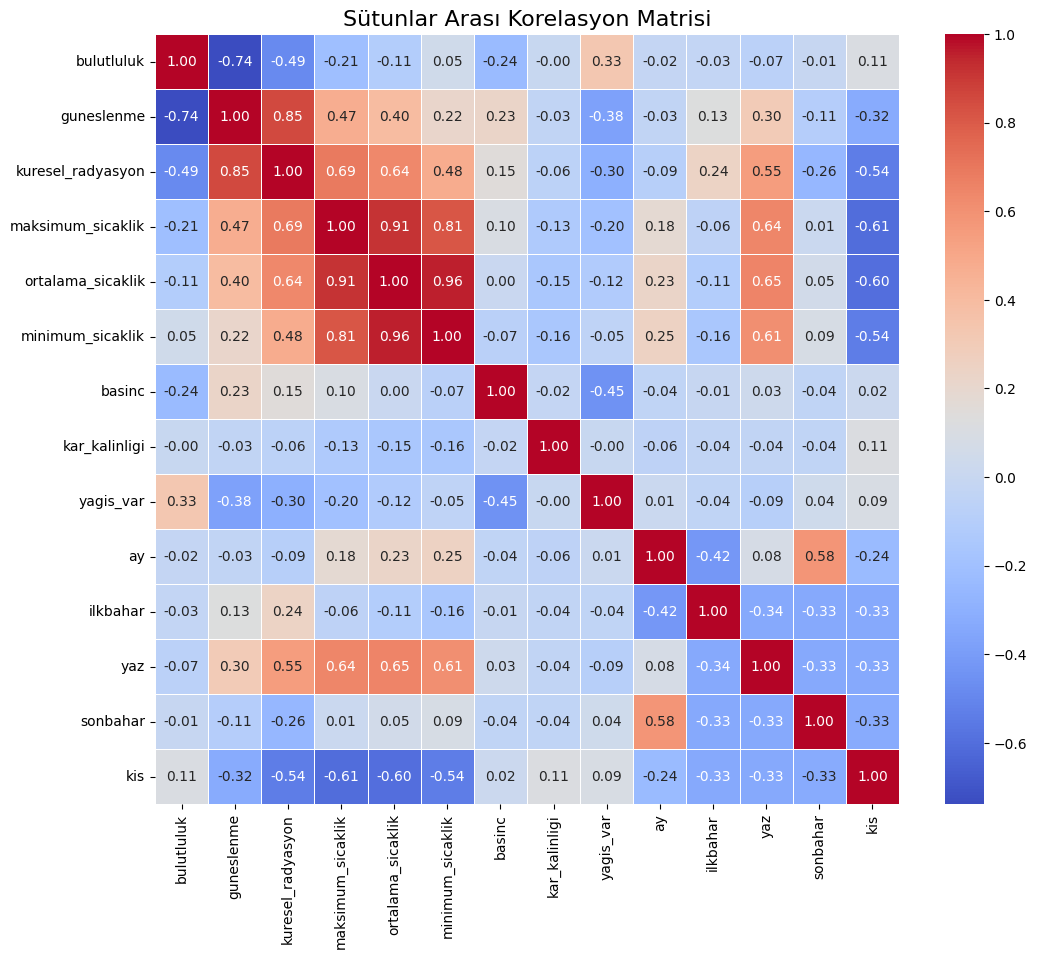

In [ ]:
# Korelasyon matrisini hesapla
correlation_matrix = data.corr(numeric_only=True)

# Korelasyon matrisini ısı haritası (heatmap) olarak görselleştir
plt.figure(figsize=(12, 10)) # Grafiğin boyutunu ayarla
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Sütunlar Arası Korelasyon Matrisi', fontsize=16)
plt.show()

### H1: "kar_kalinligi" sütununda artış olduğunda bu durum önceki gün yağış olduğu anlamına gelebilir.
"kar_kalinligi" sütunu diğer sütunlar ile matematiksel bir kolerasyon içinde değil. hipotezim yanlış ise "kar_kalinligi" sütunu mantıksal bir kolerasyon içermediğinden silinecek.

In [ ]:
# Kar kalınlığındaki boş değerleri 0 ile doldur
data['kar_kalinligi'] = data['kar_kalinligi'].fillna(0)

print(f"Kalan eksik: {data['kar_kalinligi'].isnull().sum()}")

Kalan eksik: 0


In [ ]:
# Kış aylarında kar artışı
kis_verileri = data[data['kis'] == 1].copy()
kis_verileri['kar_degisim'] = kis_verileri['kar_kalinligi'].diff()

# Kar artan günler
kar_artisi = kis_verileri[kis_verileri['kar_degisim'] > 0]

print("=== KAR ARTIŞI → YAĞIŞ İLİŞKİSİ ===\n")
print(f"Kar artan gün sayısı: {len(kar_artisi)}")
print(f"Bu günlerde yağış olan: {(kar_artisi['yagis_var'] == 1).sum()}")
print(f"Bu günlerde yağış olmayan: {(kar_artisi['yagis_var'] == 0).sum()}")
print(f"\nBAŞARI ORANI: {(kar_artisi['yagis_var'] == 1).sum() / len(kar_artisi) * 100:.1f}%")

# Detay: Yağış olmayan günlerde kar neden arttı?
kar_artti_yagis_yok = kar_artisi[kar_artisi['yagis_var'] == 0]
print(f"\n=== KAR ARTTI AMA YAĞIŞ YOK ({len(kar_artti_yagis_yok)} gün) ===")
print(kar_artti_yagis_yok[['tarih', 'kar_kalinligi', 'kar_degisim', 'yagis_var']].head(10))

=== KAR ARTIŞI → YAĞIŞ İLİŞKİSİ ===

Kar artan gün sayısı: 55
Bu günlerde yağış olan: 38
Bu günlerde yağış olmayan: 17

BAŞARI ORANI: 69.1%

=== KAR ARTTI AMA YAĞIŞ YOK (17 gün) ===
          tarih  kar_kalinligi  kar_degisim  yagis_var
11   1979-01-12            1.0          1.0          0
44   1979-02-14            1.0          1.0          0
46   1979-02-16            1.0          1.0          0
1076 1981-12-12           22.0         15.0          0
1105 1982-01-10           18.0          2.0          0
2232 1985-02-10            5.0          1.0          0
2936 1987-01-15            4.0          2.0          0
5485 1994-01-07            2.0          2.0          0
6259 1996-02-20            3.0          3.0          0
8032 2000-12-28            2.0          2.0          0


In [ ]:
# H1 red. BAŞARI ORANI: 69.1%. yeterli değil.

### H1: kar kalınlığı azaldığında yağış olmamış olabilir

In [ ]:
# Kış aylarında kar azalışı
kis_verileri = data[data['kis'] == 1].copy()
kis_verileri['kar_degisim'] = kis_verileri['kar_kalinligi'].diff()

# Kar azalan günler
kar_azalisi = kis_verileri[kis_verileri['kar_degisim'] < 0]

print("=== KAR AZALIŞI → YAĞIŞ YOK İLİŞKİSİ ===\n")
print(f"Kar azalan gün sayısı: {len(kar_azalisi)}")
print(f"Bu günlerde yağış olan: {(kar_azalisi['yagis_var'] == 1).sum()}")
print(f"Bu günlerde yağış olmayan: {(kar_azalisi['yagis_var'] == 0).sum()}")
print(f"\nYAĞIŞ OLMAMA ORANI: {(kar_azalisi['yagis_var'] == 0).sum() / len(kar_azalisi) * 100:.1f}%")

# Detay: Kar azaldı ama yağış var
kar_azaldi_yagis_var = kar_azalisi[kar_azalisi['yagis_var'] == 1]
print(f"\n=== KAR AZALDI AMA YAĞIŞ VAR ({len(kar_azaldi_yagis_var)} gün) ===")
print(f"Yüzde: {len(kar_azaldi_yagis_var) / len(kar_azalisi) * 100:.1f}%")

=== KAR AZALIŞI → YAĞIŞ YOK İLİŞKİSİ ===

Kar azalan gün sayısı: 88
Bu günlerde yağış olan: 47
Bu günlerde yağış olmayan: 41

YAĞIŞ OLMAMA ORANI: 46.6%

=== KAR AZALDI AMA YAĞIŞ VAR (47 gün) ===
Yüzde: 53.4%


In [ ]:
# H1 red. hiç bir ilişki yok.

### "kar_kalinligi" işime yaramadı ancak "kar_artisi" binary feature olarak işe yarar.

In [ ]:
# Kar kalınlığı değişimini ana DataFrame'e ekle
data['kar_degisim'] = data['kar_kalinligi'].diff()

# Kar artışı binary feature oluştur
data['kar_artisi'] = (data['kar_degisim'] > 0).astype(int)

# Kar azalışı binary feature
data['kar_azalisi'] = (data['kar_degisim'] < 0).astype(int)

print("✅ Kar değişim feature'ları eklendi")
print(f"\nKar artan gün: {data['kar_artisi'].sum()}")
print(f"Kar azalan gün: {data['kar_azalisi'].sum()}")
print(f"Kar sabit veya veri yok: {((data['kar_degisim'] == 0) | data['kar_degisim'].isnull()).sum()}")

# Orijinal sütunları temizle
data = data.drop(columns=['kar_degisim', 'kar_kalinligi'], errors='ignore')
print("\n✅ kar_degisim ve kar_kalinligi silindi (sadece binary features kaldı)")

✅ Kar değişim feature'ları eklendi

Kar artan gün: 63
Kar azalan gün: 95
Kar sabit veya veri yok: 15183

✅ kar_degisim ve kar_kalinligi silindi (sadece binary features kaldı)


### H1: "minimum_sicaklik" ve "maksimum-sicaklik" verilerinin ortalaması ile "ortalama_sicaklik" verileri bulunabilir mi?

In [ ]:
# İnterpolasyon ile doldur (güncellenen pandas syntax)
data['minimum_sicaklik'] = data['minimum_sicaklik'].interpolate(method='linear')
data['maksimum_sicaklik'] = data['maksimum_sicaklik'].interpolate(method='linear')

# Başta/sonda kalan eksikleri doldur
data['minimum_sicaklik'] = data['minimum_sicaklik'].bfill().ffill()
data['maksimum_sicaklik'] = data['maksimum_sicaklik'].bfill().ffill()

In [ ]:
data['minimum_sicaklik'].isnull().sum()

np.int64(0)

In [ ]:
data['maksimum_sicaklik'].isnull().sum()

np.int64(0)

In [ ]:
from scipy.stats import pearsonr

# Hesaplama
hesaplanan_ortalama = (data['minimum_sicaklik'] + data['maksimum_sicaklik']) / 2

# Korelasyon kontrolü
temiz_data = data[['ortalama_sicaklik']].join(hesaplanan_ortalama.rename('hesaplanan_ortalama')).dropna()
korelasyon, _ = pearsonr(temiz_data['ortalama_sicaklik'], temiz_data['hesaplanan_ortalama'])

korelasyon

np.float64(0.978689667911034)

In [ ]:
eksik_sayisi = data['ortalama_sicaklik'].isnull().sum()
data['ortalama_sicaklik'] = data['ortalama_sicaklik'].fillna(hesaplanan_ortalama)
data['ortalama_sicaklik'].isnull().sum()

np.int64(0)

### H1: "kuresel_radyasyon" ve "guneslenme" arasında kolerasyon kullanılarak "kuresel_radyasyon"daki boş veriler doldurulabilir mi?

In [ ]:
# 'kuresel_radyasyon' ve 'guneslenme' sütunları arasındaki korelasyon katsayısını hesapla
korelasyon_katsayısı = data[['kuresel_radyasyon', 'guneslenme']].corr().iloc[0, 1]

korelasyon_katsayısı

np.float64(0.852631907113062)

In [ ]:
# kolerasyon kuvvetli.

from sklearn.linear_model import LinearRegression

# Temiz veriyi al
temiz = data[['guneslenme', 'kuresel_radyasyon']].dropna()

# Model: Güneşlenme → Küresel Radyasyon
model = LinearRegression()
model.fit(temiz[['guneslenme']], temiz['kuresel_radyasyon'])

# Eksik radyasyonu doldur (güneşlenme dolu olanlar)
mask = data['kuresel_radyasyon'].isnull() & data['guneslenme'].notnull()

if mask.sum() > 0:
    data.loc[mask, 'kuresel_radyasyon'] = model.predict(data.loc[mask, ['guneslenme']])

In [ ]:
data['kuresel_radyasyon'].isnull().sum()

np.int64(0)

### H1: "bulutluluk" ve "guneslenme" arasında ters kolerasyon kullanılarak "bulutluluk"daki boş veriler doldurulabilir mi?

In [ ]:
# Temiz veriyi al
temiz = data[['bulutluluk', 'guneslenme']].dropna()

# Korelasyon hesapla
korelasyon, _ = pearsonr(temiz['bulutluluk'], temiz['guneslenme'])

korelasyon

np.float64(-0.7382905514891034)

In [ ]:
# kolerasyon kuvvetli.

# Temiz veriyi al
temiz = data[['guneslenme', 'bulutluluk']].dropna()

# Model: Güneşlenme → Bulutluluk
model = LinearRegression()
model.fit(temiz[['guneslenme']], temiz['bulutluluk'])

# Eksik bulutluluğu doldur
mask = data['bulutluluk'].isnull() & data['guneslenme'].notnull()

if mask.sum() > 0:
    data.loc[mask, 'bulutluluk'] = model.predict(data.loc[mask, ['guneslenme']])

In [ ]:
data['bulutluluk'].isnull().sum()

np.int64(0)

### H1: "basinc" sütununda ki boş değerler içinde bulundukları ayın ortalama değerlerine göre doldurulabilir mi?

In [ ]:
data['basinc'] = data['basinc'] / 100

aylik_ortalama = data.groupby('ay')['basinc'].agg(['mean', 'std', 'min', 'max', 'count'])
aylik_ortalama['fark'] = aylik_ortalama['max'] - aylik_ortalama['min']

print(f"Ortalama standart sapma: {aylik_ortalama['std'].mean():.2f} hPa")
print(f"Ortalama ay içi fark: {aylik_ortalama['fark'].mean():.2f} hPa")
print(f"Genel std sapma: {data['basinc'].std():.2f} hPa")

Ortalama standart sapma: 10.12 hPa
Ortalama ay içi fark: 60.72 hPa
Genel std sapma: 10.50 hPa


In [ ]:
# H1 red. Aylık ortalama riskli.

In [ ]:
# İnterpolasyon ile doldur

data['basinc'] = data['basinc'].interpolate(method='linear').bfill().ffill()

In [ ]:
data['basinc'].isnull().sum()

np.int64(0)

### veri seti optimizasyonu için son bir kontrol

In [ ]:
# Tüm sütunlardaki boş cell sayısı kontrolü

data.isnull().sum()

,0
tarih,0
bulutluluk,0
guneslenme,0
kuresel_radyasyon,0
maksimum_sicaklik,0
ortalama_sicaklik,0
minimum_sicaklik,0
basinc,0
yagis_var,0
ay,0


In [ ]:
data.columns

Index(['tarih', 'bulutluluk', 'guneslenme', 'kuresel_radyasyon',
       'maksimum_sicaklik', 'ortalama_sicaklik', 'minimum_sicaklik', 'basinc',
       'yagis_var', 'ay', 'ilkbahar', 'yaz', 'sonbahar', 'kis', 'kar_artisi',
       'kar_azalisi'],
      dtype='object')

### modelin daha optimize çalışması için datatype üzerinde oynama yapacağım.

In [ ]:
data.dtypes

,0
tarih,datetime64[ns]
bulutluluk,float64
guneslenme,float64
kuresel_radyasyon,float64
maksimum_sicaklik,float64
ortalama_sicaklik,float64
minimum_sicaklik,float64
basinc,float64
yagis_var,int64
ay,int32


In [ ]:
# mevsimleri bool değerlere çevir.

data['ilkbahar'] = data['ilkbahar'].astype(bool)
data['yaz'] = data['yaz'].astype(bool)
data['sonbahar'] = data['sonbahar'].astype(bool)
data['kis'] = data['kis'].astype(bool)

print(data[['kis','yaz','ilkbahar','sonbahar']])

        kis    yaz  ilkbahar  sonbahar
0      True  False     False     False
1      True  False     False     False
2      True  False     False     False
3      True  False     False     False
4      True  False     False     False
...     ...    ...       ...       ...
15336  True  False     False     False
15337  True  False     False     False
15338  True  False     False     False
15339  True  False     False     False
15340  True  False     False     False

[15341 rows x 4 columns]


In [ ]:
# yagis_var'ı bool'a çevir

data['yagis_var'] = data['yagis_var'].astype(bool)

print(f"Tip: {data['yagis_var'].dtype}")
data.yagis_var.unique()

Tip: bool


array([ True, False])

In [ ]:
# Tarih'i sil

data = data.drop(columns=['tarih'])

In [ ]:
data = data.drop(columns=["minimum_sicaklik"])
data = data.drop(columns=['maksimum_sicaklik'])

In [ ]:
data.dtypes

,0
bulutluluk,float64
guneslenme,float64
kuresel_radyasyon,float64
ortalama_sicaklik,float64
basinc,float64
yagis_var,bool
ay,int32
ilkbahar,bool
yaz,bool
sonbahar,bool


In [ ]:
data.columns

Index(['bulutluluk', 'guneslenme', 'kuresel_radyasyon', 'ortalama_sicaklik',
       'basinc', 'yagis_var', 'ay', 'ilkbahar', 'yaz', 'sonbahar', 'kis',
       'kar_artisi', 'kar_azalisi'],
      dtype='object')

In [ ]:
# modelleme başlasın.

# modelleme

### Korelasyon matrisi oluşturma

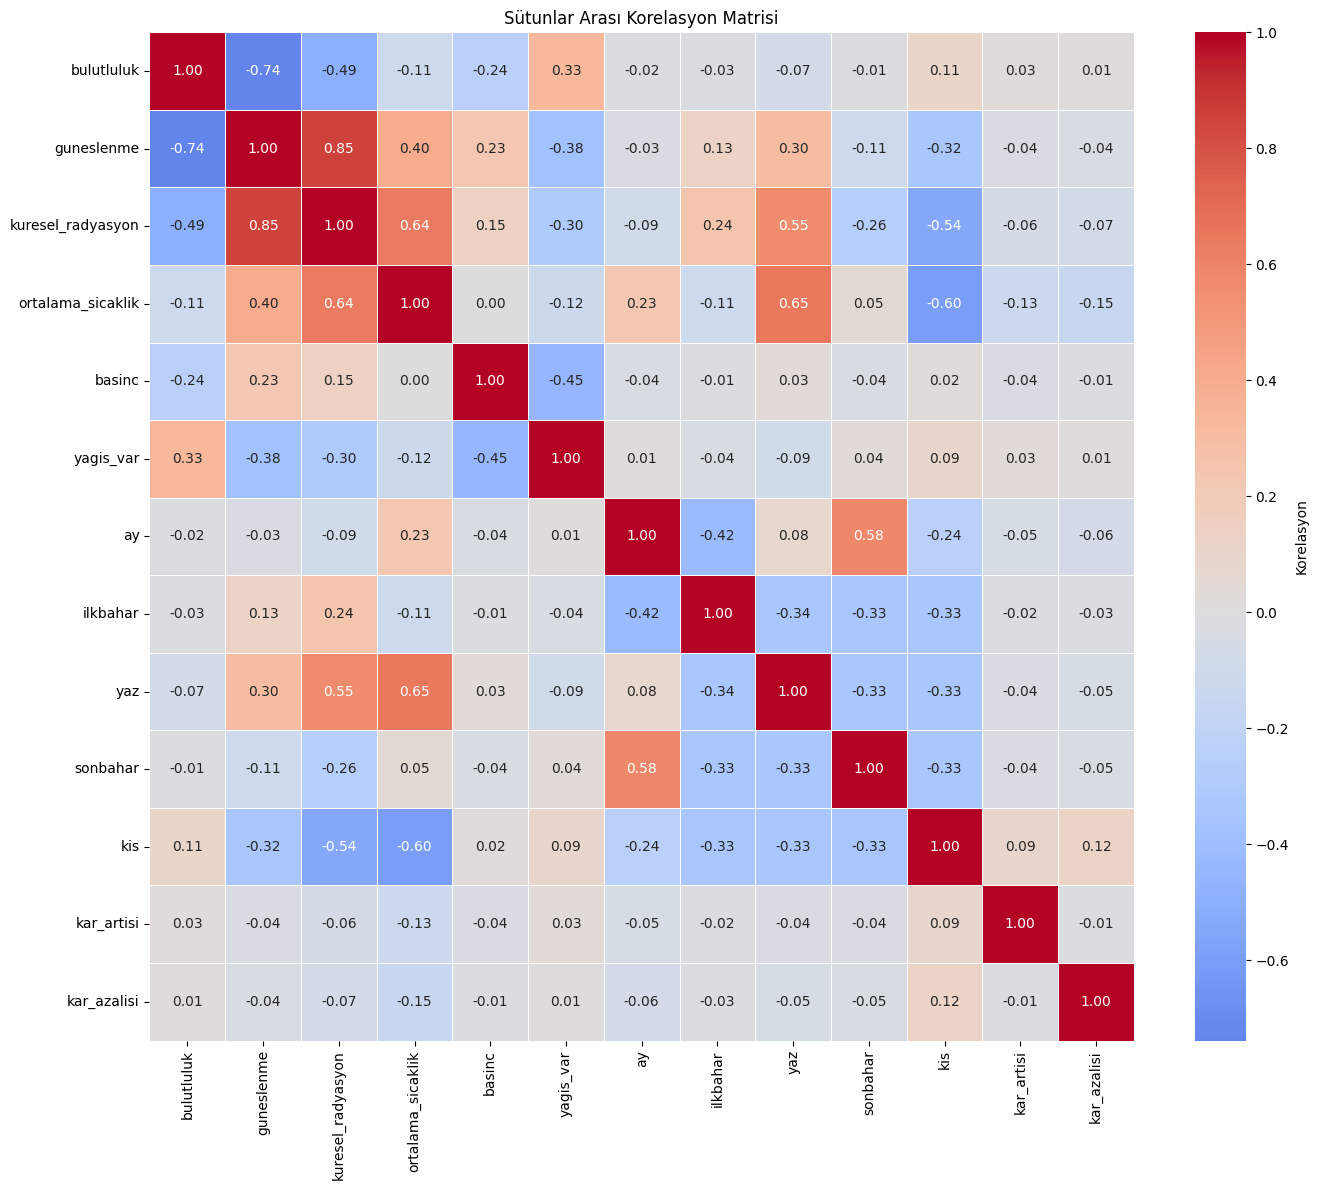

In [ ]:
# Sayısal ve boolean sütunları al
korelasyon_matrisi = data[data.columns].corr()

# Görselleştirme
plt.figure(figsize=(14, 12))
sns.heatmap(korelasyon_matrisi, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={'label': 'Korelasyon'})
plt.title('Sütunlar Arası Korelasyon Matrisi')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

### Yağışı etkileyen faktörleri bulma
r en yüksek pozitif korelasyona sahip değişkenleri yağışı artıran faktörler olarak listeleme.

In [ ]:
yagis_etkileri = data.corr()['yagis_var'].sort_values(ascending=False)

yagisi_artiran_faktorler = yagis_etkileri[yagis_etkileri > 0].drop('yagis_var', errors='ignore')

print(f"Yağışı Artıran Faktörler {yagisi_artiran_faktorler}")

Yağışı Artıran Faktörler bulutluluk     0.334170
kis            0.093243
sonbahar       0.037214
kar_artisi     0.030042
ay             0.013659
kar_azalisi    0.012221
Name: yagis_var, dtype: float64


### Modelleme: Aşağıdaki modellerden en az 3 tanesi test edilecek.
*	Logistic Regression
*	Decision Tree
*	Random Forest


In [ ]:
data.columns

Index(['bulutluluk', 'guneslenme', 'kuresel_radyasyon', 'ortalama_sicaklik',
       'basinc', 'yagis_var', 'ay', 'ilkbahar', 'yaz', 'sonbahar', 'kis',
       'kar_artisi', 'kar_azalisi'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Hedef ve Bağımsız Değişkenleri Ayırma
# 'yagis_var' hedefimiz olduğu için onu y'ye, geri kalanları X'e alıyoruz.
X = data.drop(columns=['yagis_var'])
y = data['yagis_var']

# 2. Eğitim ve Test Seti Olarak Bölme
# Verinin %80'i eğitim, %20'si test için ayrılır. 'random_state' tekrar edilebilirlik sağlar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boyutları kontrol edelim / Check dimensions
print(f"Eğitim Seti (X_train): {X_train.shape}")
print(f"Test Seti (X_test): {X_test.shape}")

Eğitim Seti (X_train): (12272, 12)
Test Seti (X_test): (3069, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import numpy as np

# 1. Standardizasyon (Sadece Lojistik Regresyon için gerekli)
# 1. Standardization (Necessary only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelleri tekrar tanımlayalım / Re-define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

print(f"{'Model':<20} | {'Accuracy':<10} | {'RMSE':<10} | {'R2':<10}")
print("-" * 60)

for name, model in models.items():
    # Lojistik Regresyon ise ölçekli veriyi, değilse normal veriyi kullan
    # Use scaled data if Logistic Regression, else use normal data
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrikler / Metrics
    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name:<20} | {acc:.4f}     | {rmse:.4f}     | {r2:.4f}")

Model                | Accuracy   | RMSE       | R2        
------------------------------------------------------------
Logistic Regression  | 0.7338     | 0.5160     | -0.0676
Decision Tree        | 0.6540     | 0.5883     | -0.3877
Random Forest        | 0.7315     | 0.5182     | -0.0767


* Doğruluk (Accuracy): En yüksek doğruluk oranına Lojistik Regresyon (%73.4) sahiptir, ancak Random Forest (%73.2) ile arasındaki fark ihmal edilebilir düzeydedir. Karar Ağacı (Decision Tree) ise %65.4 ile en zayıf performansı göstermiştir.

* RMSE: Hata oranını gösteren RMSE değerinde, düşük olması daha iyidir. Lojistik Regresyon (0.5160) en düşük hataya sahipken, Random Forest (0.5182) onu takip etmektedir. Karar Ağacı (0.5883) en yüksek hataya sahiptir.

* R2 Skoru: Sınıflandırma problemlerinde R2 skoru genellikle anlamsızdır ve negatif çıkması modelin "ortalama değerden" bile daha kötü tahmin yaptığını (regresyon mantığıyla) gösterebilir. Burada Lojistik Regresyon, 0'a en yakın değerle (-0.0676) matematiksel olarak en iyi sonucu vermiştir.

**Sonuç: Bu veri seti için Lojistik Regresyon ve Random Forest modelleri neredeyse aynı performansı göstermiş ve en başarılı modeller olmuştur. Karar Ağacı modeli ise bu problemde yetersiz kalmıştır.**